Link: https://langchain-ai.github.io/langgraph/tutorials/introduction/

In [1]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [3]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-2.5-32b")
result=llm.invoke(messages)
result

AIMessage(content='Watching orcas (also known as killer whales) in their natural habitat can be an incredible experience. In the United States, there are several locations known for their orca populations. Here are a few notable spots:\n\n1. **San Juan Islands, Washington**: This is one of the best places in the U.S. to see orcas. The San Juan Islands are part of the Salish Sea and home to the Southern Resident killer whale population. Whale watching tours are abundant from May to September, which is the prime time to catch a glimpse of these magnificent creatures.\n\n2. **Southeast Alaska**: The Inside Passage and the waters around Juneau, Sitka, and Prince William Sound are also good areas to see orcas. The Northern Resident orcas can be observed here, and many cruise ships and local small boat tours offer whale watching experiences.\n\n3. **Monterey Bay, California**: While less common than in the northern parts of the U.S., orcas can occasionally be seen in Monterey Bay, especially

In [ ]:
# Define llm
llm=ChatGroq(model="qwen-2.5-32b")

# Define the function
def add(a:int,b:int)-> int:
    return a+b

# Bind the tool with llm
llm_with_tools=llm.bind_tools([add])

tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 3", name="Lance")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_dkxa', 'function': {'arguments': '{"a": 2, "b": 3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 173, 'total_tokens': 198, 'completion_time': 0.063069326, 'prompt_time': 0.010394188, 'queue_time': 0.020029615, 'total_time': 0.073463514}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_7b9ecfcd5f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-fe66152c-e691-4208-b7cd-eb1830f8f411-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 3}, 'id': 'call_dkxa', 'type': 'tool_call'}], usage_metadata={'input_tokens': 173, 'output_tokens': 25, 'total_tokens': 198})

In [6]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 3},
  'id': 'call_dkxa',
  'type': 'tool_call'}]

In [7]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [8]:
initial_message=[AIMessage(content="Hello! How can I assist you?", name="Model"),
                 HumanMessage(content="I'm looking for information on generative ai.", name="Krish")
                ]
# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

add_messages(initial_message,new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='ea201391-4e6b-4f47-a07a-b90147507644'),
 HumanMessage(content="I'm looking for information on generative ai.", additional_kwargs={}, response_metadata={}, name='Krish', id='7aec5e54-ce80-4341-8228-109178e21e04'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='0bf4c66a-908f-4d4e-bf9b-f5d1ea9ac856')]

## Chatbot 1 

Link: https://langchain-ai.github.io/langgraph/tutorials/introduction/

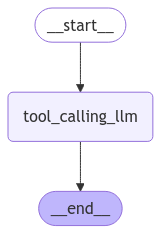

In [14]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Create a state graph
class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]
    

## 1) llm to tool calling llm node
# Define llm
llm=ChatGroq(model="qwen-2.5-32b")

# Define the function to form as a tool
def add(a:int,b:int)-> int:
    return a+b

# Bind the tool with llm
llm_with_tools=llm.bind_tools([add])

# Deine the function to form tool_calling_llm Node
def tool_calling_llm(state: MessageState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}



## 2) Build Graph
builder = StateGraph(MessageState)

# Node
builder.add_node("tool_calling_llm", tool_calling_llm)

# Logic
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

# Add the node and edges
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
messages=graph.invoke({"messages":HumanMessage(content="What is 2 minus 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 2 minus 3
================================== Ai Message ==================================
Tool Calls:
  add (call_2w7d)
 Call ID: call_2w7d
  Args:
    a: 2
    b: -3


## Chatbot 2

Link: https://langchain-ai.github.io/langgraph/tutorials/introduction/

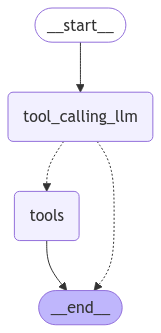

In [25]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

#from langgraph.graph import MessagesState
# (or)
# Create a state graph
class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]
    

## 1) llm to tool calling llm node
# Define llm
llm=ChatGroq(model="qwen-2.5-32b")

# Define the function to form as a tool
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# Bind the tool with llm
llm_with_tools = llm.bind_tools([multiply])

# Deine the function to form tool_calling_llm Node
def tool_calling_llm(state: MessageState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


## 2) Build Graph
builder = StateGraph(MessageState)

# Create Node
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply]))

#  Create Edges
builder.add_edge(START, "tool_calling_llm")

# Conditional edges
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)

builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

Automatically the tool is called baes on our input

In [26]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Hello, what is 2 multiplied by 2? .")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello, what is 2 multiplied by 2? .
================================== Ai Message ==================================
Tool Calls:
  multiply (call_1q5a)
 Call ID: call_1q5a
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: multiply

4


Without tool call

In [27]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Who are you")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Who are you
================================== Ai Message ==================================

I am Qwen, a large language model created by Alibaba Cloud. I can answer questions, provide information, and assist with a variety of tasks. How can I assist you today?


## Chatbot 3 (HW)

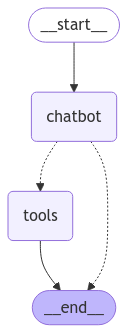

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

#from langgraph.graph import MessagesState
# (or)
# Create a state graph
class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]
    

## 1) llm to tool calling llm node
# Define llm
llm=ChatGroq(model="qwen-2.5-32b")

# Define the function to form a chatbot node
def chatbot(state:MessageState):
    return {"messages":[llm.invoke(state["messages"])]}


# Define the function to form as a tool
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# Bind the tool with llm
#llm_with_tools = llm.bind_tools([multiply])



## 2) Build Graph
builder = StateGraph(MessageState)

# Create Node
builder.add_node("chatbot",chatbot)
builder.add_node("tools", ToolNode([multiply]))

#  Create Edges
builder.add_edge(START, "chatbot")

# Conditional edges
builder.add_conditional_edges(
    "chatbot",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)

builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

Without tool call

In [29]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Who are you")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Who are you
================================== Ai Message ==================================

I am Qwen, a large language model created by Alibaba Cloud. I can provide information, answer questions, and have conversations across a wide range of topics. How can I assist you today?


Tool should be called if the NLP question is like math

In [30]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Hello, what is 2 multiplied by 2? .")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello, what is 2 multiplied by 2? .
================================== Ai Message ==================================

2 multiplied by 2 is 4.


OBSERVATION:

Simple chatbot node is not having the ability to decide if it should call the tool or without toll so in the above example "chatbot 2" the chatbot node is converted as tool calling llm node and a tool node.